In [1]:
import pandas as pd 
import seaborn as sns



In [2]:
df=pd.read_csv("C:/Users/Aya Zaoui/Downloads/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.drop(['id','date','sqft_basement'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

# visualization

<AxesSubplot:xlabel='price', ylabel='Count'>

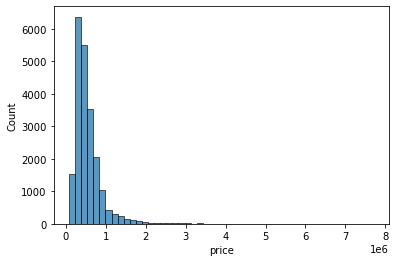

In [13]:
sns.histplot(data=df, x='price',bins=50)

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

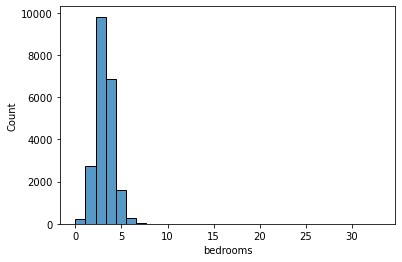

In [17]:
sns.histplot(data=df, x='bedrooms',bins=30)

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

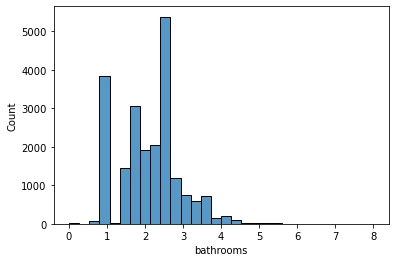

In [18]:
sns.histplot(data=df, x='bathrooms',bins=30)

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

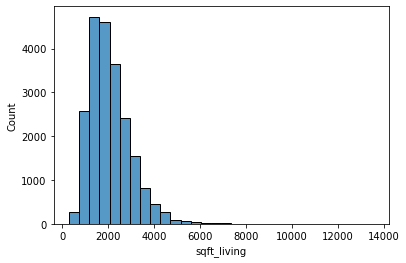

In [19]:
sns.histplot(data=df, x='sqft_living',bins=30)

In [20]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# Model



In [44]:
#Splitting data
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
X=df.drop('sqft_living',axis=1)
Y=df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

lin_reg=LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg.score(X_test,Y_test)

1.0

In [46]:
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
X=df['sqft_living'].values.reshape(-1,1)
Y=df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

lin_reg=LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg.score(X_test,Y_test)


0.487354628185764

In [48]:
X=df.drop('price', axis=1)
Y=df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

multi_reg=LinearRegression()
multi_reg.fit(X_train, Y_train)
multi_reg.score(X_test,Y_test)


0.7001606388259582

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)
X=poly.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

poly_reg=LinearRegression()
poly_reg.fit(X_train, Y_train)
poly_reg.score(X_test,Y_test)


0.8152882019109815